In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
life_exp = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#Countries that data is collected from

In [ ]:
import plotly.express as px

countries = life_exp[['Country', 'Status']].drop_duplicates()

fig = px.choropleth(countries, locations="Country",
                    locationmode='country names',
                    color="Status", 
                    hover_name="Country",
                    hover_data={
                        'Status': True,
                        'Country': False
                    },
                    color_discrete_map={
                        'Developing' : 'CadetBlue',
                        'Developed': 'DarkSalmon'
                    })

fig.show()

#Countries by GDP in 2015

In [ ]:
gdp = life_exp[['Country', 'GDP', 'Year']]
gdp_2015 = gdp[gdp['Year'] == 2015]

fig = px.choropleth(gdp_2015, locations="Country",
                    locationmode='country names',
                    color="GDP", 
                    hover_name="Country",
                    hover_data={
                        'GDP': True,
                        'Country': False
                    },
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )

fig.show()

#Countries by Life expectancy in 2015

In [ ]:
expectancy = life_exp[['Country', 'Year', 'Life expectancy ']]
expectancy = expectancy[expectancy['Year'] == 2015]
fig = px.choropleth(expectancy, locations="Country",
                    locationmode='country names',
                    color="Life expectancy ", 
                    hover_name="Country",
                    hover_data={
                        'Life expectancy ': True,
                        'Country': False
                    },
                    color_continuous_scale=px.colors.sequential.Pinkyl,
                    )

fig.show()

#Data of Spain from 2000 to 2015

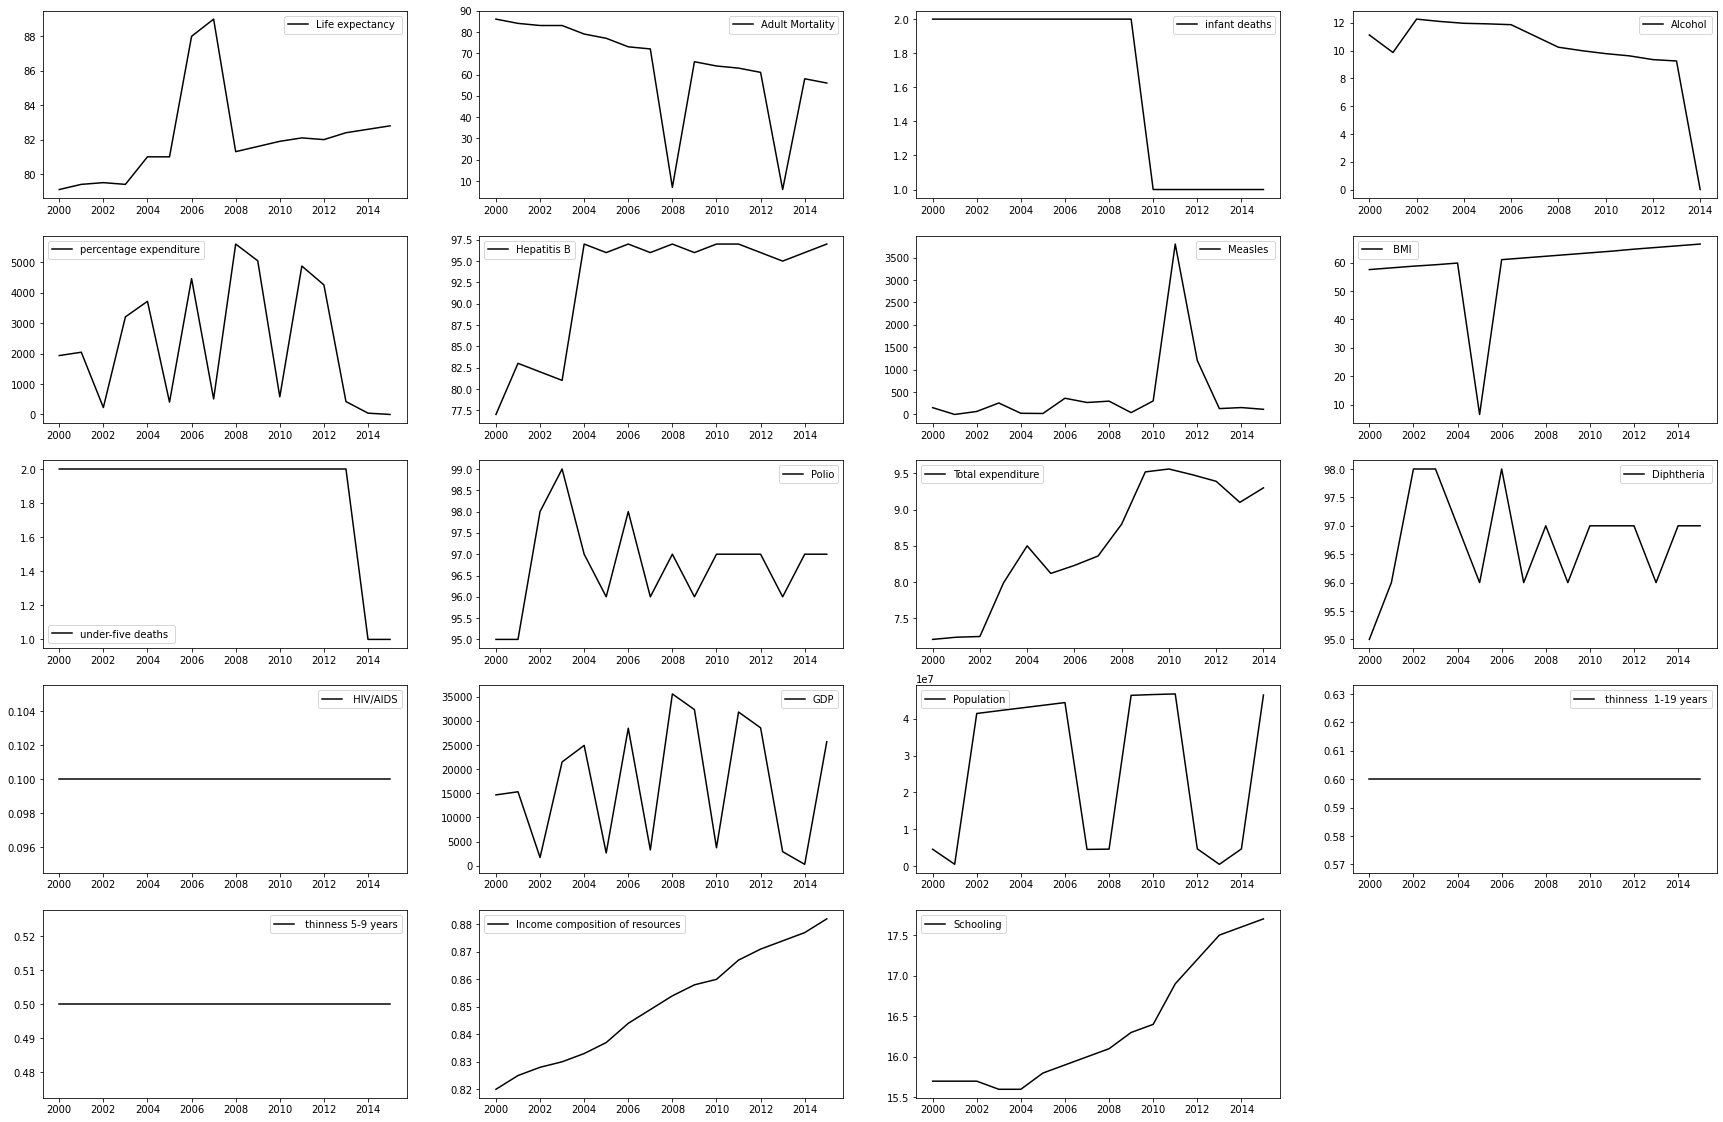

In [ ]:
fig, axs = plt.subplots(5,4, figsize=(30, 20))
i = 0
j = 0
temp = life_exp[life_exp['Country'] == 'Spain']
for x in life_exp:
  if x in ['Country', 'Year', 'Status']:
    continue
  axs[i, j].plot(temp[[x,'Year']].set_index('Year'), color='black')
  axs[i, j].legend([x])
  if j < 3:
    j += 1
  else:
    j = 0
    i += 1
fig.delaxes(axs[4][3])


#Heat map

In [ ]:
df = life_exp.drop(columns=['Year', 'Country', 'Status'])
corr = df.corr()

In [ ]:
fig = px.imshow(corr, text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Mint)
fig.update_layout(height=800, width=1000)
fig.show()